In [172]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import time

In [173]:
%run Algorithms.ipynb

In [174]:
datasets = {
    'education_1_df': 'Datasets/campus-placement-prediction.csv',
    'education_2_df': 'Datasets/predict-dropout-or-academic-success.csv',
    'education_3_df': 'Datasets/student-performance-dataset.csv',}

anomalous_datasets = {
    'a_education_1_df': 'Datasets/campus-placement-prediction_anomaly.csv',
    'a_education_2_df': 'Datasets/predict-dropout-or-academic-success_anomaly.csv',
    'a_education_3_df': 'Datasets/student-performance-dataset_anomaly.csv',
}


finance_1_df = pd.read_csv('Datasets/bank-customer-churn-prediction.csv')
finance_2_df = pd.read_csv('Datasets/financial-risk-for-loan-approval.csv')
finance_3_df = pd.read_csv('Datasets/loan-approval-classification-dataset.csv')

education_1_df = pd.read_csv('Datasets/campus-placement-prediction.csv')
education_2_df = pd.read_csv('Datasets/predict-dropout-or-academic-success.csv')
education_3_df = pd.read_csv('Datasets/student-performance-dataset.csv')

health_1_df = pd.read_csv('Datasets/fetal-health-classifiation.csv')
health_2_df = pd.read_csv('Datasets/heart-disease-health-indicators-dataset.csv')
health_3_df = pd.read_csv('Datasets/patient-treatment-classification.csv')

In [175]:
for df_name, file_path in datasets.items():
    df = pd.read_csv(file_path)
    used_cols = [col for col in df.columns if df[col].nunique() > 50]
    print(used_cols)

['sl_no', 'ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p']
['Previous qualification (grade)', 'Admission grade', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)']
['StudentID', 'StudyTimeWeekly', 'GPA']


In [166]:
def classify(dataframe, filename):
    # Features and target
    if filename in ['Datasets/campus-placement-prediction.csv', 'Datasets/campus-placement-prediction_anomaly.csv']:
        dataframe.info()
        X = dataframe.drop(columns=['status'])
        y = dataframe['status']
    elif filename in ['Datasets/predict-dropout-or-academic-success.csv', 'Datasets/predict-dropout-or-academic-success_anomaly.csv']:
        X = dataframe.drop(columns=['Target'])
        y = dataframe['Target']
    elif filename in ['Datasets/student-performance-dataset.csv', 'Datasets/student-performance-dataset_anomaly.csv']:
        X = dataframe.drop(columns=['GradeClass'])
        y = dataframe['GradeClass']
    elif filename == 'Datasets/bank-customer-churn-prediction.csv':
        X = dataframe.drop(columns=['churn'])
        y = dataframe['churn']
    elif filename == 'Datasets/financial-risk-for-loan-approval.csv':
        X = dataframe.drop(columns=['LoanApproved'])
        y = dataframe['LoanApproved']
    elif filename == 'Datasets/loan-approval-classification-dataset.csv':
        X = dataframe.drop(columns=['loan_status'])
        y = dataframe['loan_status']
    elif filename == 'Datasets/fetal-health-classifiation.csv':
        X = dataframe.drop(columns=['fetal_health'])
        y = dataframe['fetal_health']
    elif filename == 'Datasets/heart-disease-health-indicators-dataset.csv':
        X = dataframe.drop(columns=['HeartDiseaseorAttack'])
        y = dataframe['HeartDiseaseorAttack']
    elif filename == 'Datasets/patient-treatment-classification.csv':
        X = dataframe.drop(columns=['SOURCE'])
        y = dataframe['SOURCE']
    
        
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Initialize and train RandomForestRegressor
    rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_classifier.fit(X_train, y_train)
    
    # Predict on test data
    y_pred = rf_classifier.predict(X_test)
    
    # Evaluate performance
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    
    feature_importances = rf_classifier.feature_importances_
    plt.figure(figsize=(10, 8))
    plt.bar(X.columns, feature_importances)
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.title('Feature Importance')
    plt.xticks(rotation=90)  # Rotate labels 90 degrees (vertical)
    
    # Display the plot
    plt.tight_layout() 
    plt.show()



sl_no
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    float64
 1   ssc_p           215 non-null    float64
 2   ssc_b           215 non-null    float64
 3   hsc_p           215 non-null    float64
 4   hsc_b           215 non-null    float64
 5   hsc_s           215 non-null    float64
 6   degree_p        215 non-null    float64
 7   degree_t        215 non-null    float64
 8   workex          215 non-null    float64
 9   etest_p         215 non-null    float64
 10  specialisation  215 non-null    float64
 11  mba_p           215 non-null    float64
 12  status          215 non-null    float64
dtypes: float64(13)
memory usage: 22.0 KB
Accuracy: 0.7906976744186046

Classification Report:
               precision    recall  f1-score   support

         0.0       0.81      0.94      0.87        31
         

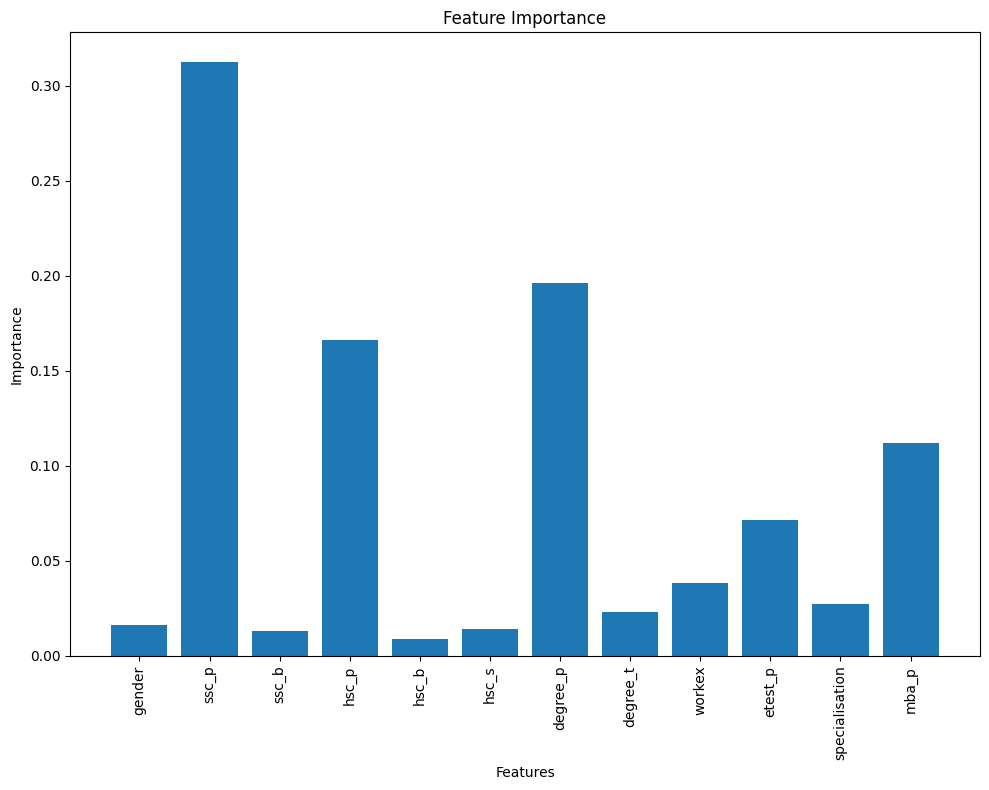

Accuracy: 0.7615819209039548

Classification Report:
               precision    recall  f1-score   support

         0.0       0.84      0.78      0.81       316
         1.0       0.76      0.93      0.83       418
         2.0       0.49      0.28      0.35       151

    accuracy                           0.76       885
   macro avg       0.70      0.66      0.67       885
weighted avg       0.74      0.76      0.74       885



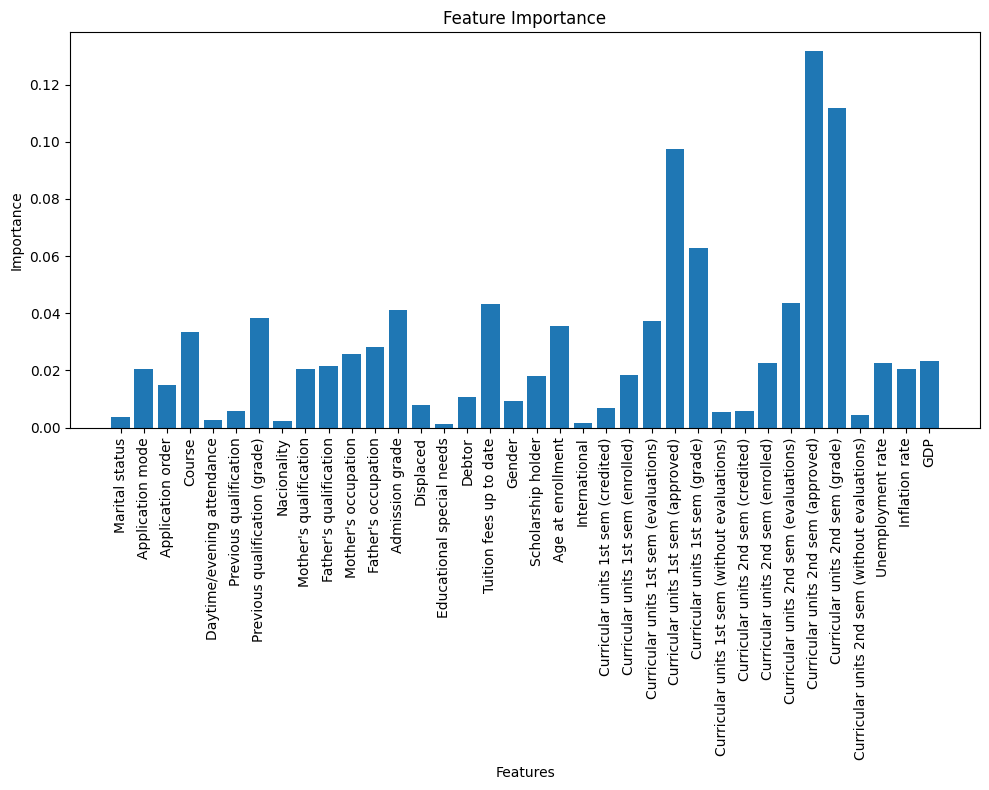

StudentID
Accuracy: 0.9102296450939458

Classification Report:
               precision    recall  f1-score   support

         0.0       0.83      0.45      0.59        22
         1.0       0.81      0.86      0.83        49
         2.0       0.93      0.87      0.90        85
         3.0       0.89      0.90      0.89        86
         4.0       0.94      0.98      0.96       237

    accuracy                           0.91       479
   macro avg       0.88      0.81      0.83       479
weighted avg       0.91      0.91      0.91       479



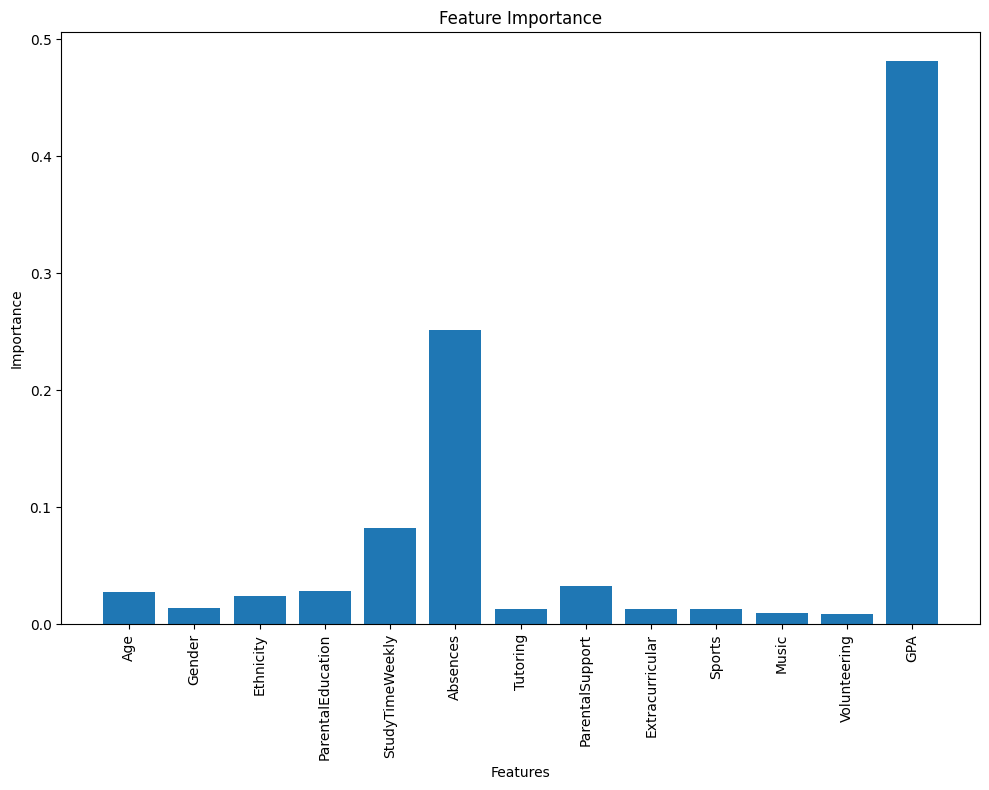

In [167]:
for df_name, file_path in datasets.items():
    df = pd.read_csv(file_path)
    df = preprocessing(df, file_path)
    classify(df, file_path)

In [168]:
def run_dbscan():
    start_time = time.time()
    
    for df_name, file_path in anomalous_datasets.items():
        df = pd.read_csv(file_path)
        df = preprocessing(df, file_path)
        df = drop_DBSCAN(df, file_path)
        classify(df, file_path)
    
    end_time = time.time()
    elapsed_time = end_time - start_time
    
    print(f"Total time taken: {elapsed_time} seconds")

In [169]:
def run_ocsvm():
    start_time = time.time()
    
    for df_name, file_path in anomalous_datasets.items():
        df = pd.read_csv(file_path)
        df = preprocessing(df, file_path)
        df = drop_OCSVM(df, file_path)
        classify(df, file_path)
    
    end_time = time.time()
    elapsed_time = end_time - start_time
    
    print(f"Total time taken: {elapsed_time} seconds")

In [170]:
def run_isolation_forest():
    start_time = time.time()
    
    for df_name, file_path in anomalous_datasets.items():
        df = pd.read_csv(file_path)
        df = drop_IF(df, file_path)
        classify(df, file_path)
    
    end_time = time.time()
    elapsed_time = end_time - start_time
    
    print(f"Total time taken: {elapsed_time} seconds")

['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p']
[(115, np.float64(96.6), np.float64(72.34)), (197, np.float64(83.96), np.float64(53.0))]


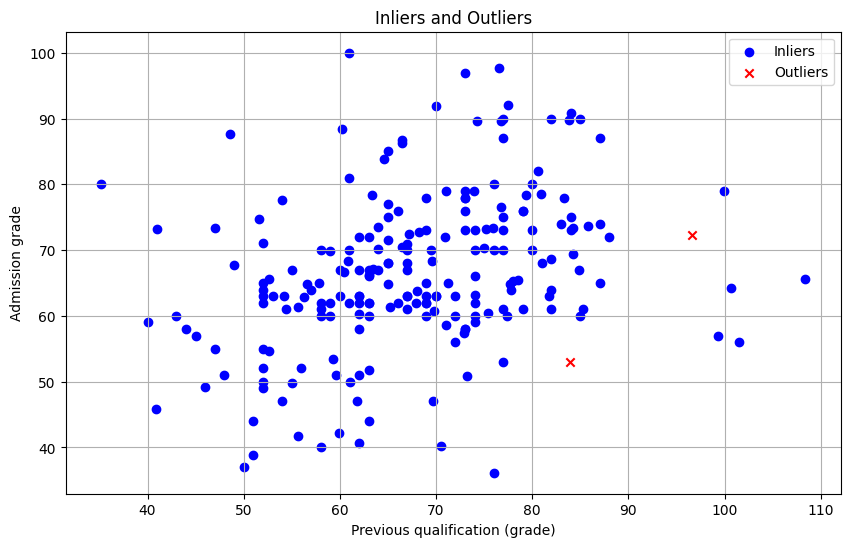

[(6, np.float64(46.0), np.float64(79.0)), (145, np.float64(108.41), np.float64(71.25))]


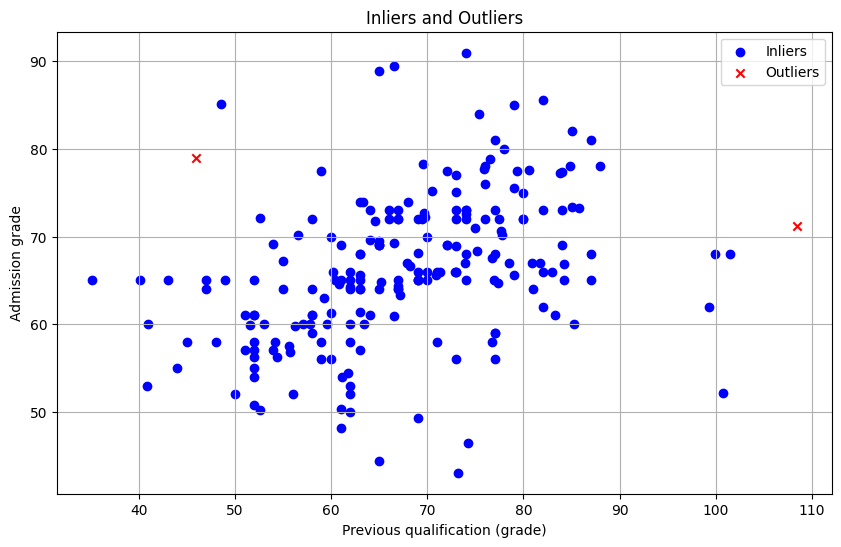

[(178, np.float64(101.46), np.float64(52.21)), (180, np.float64(65.0), np.float64(30.43))]


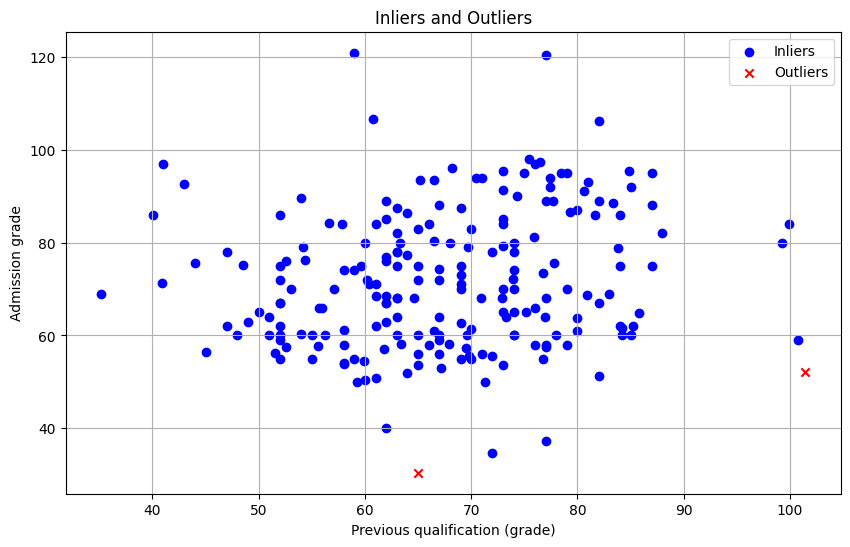

[(126, np.float64(79.0), np.float64(82.45)), (155, np.float64(51.57), np.float64(81.59))]


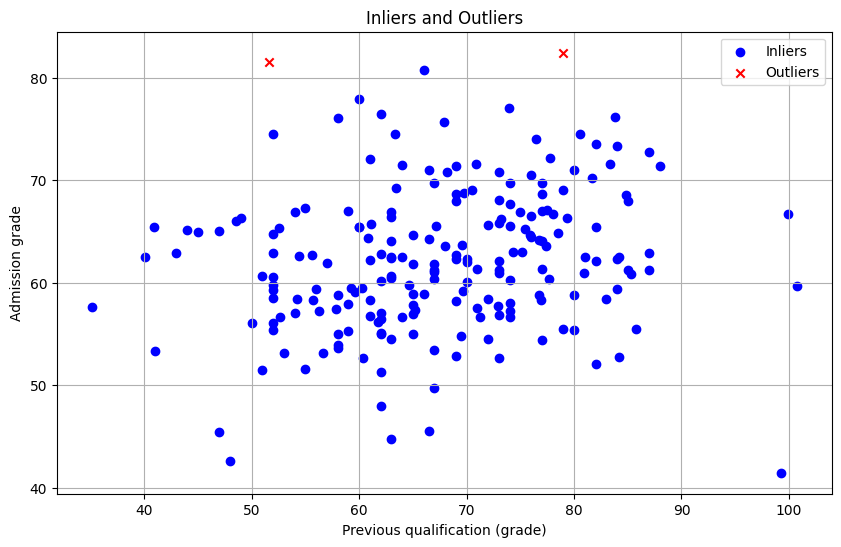

[(24, np.float64(97.7), np.float64(78.86)), (174, np.float64(50.83), np.float64(43.05))]


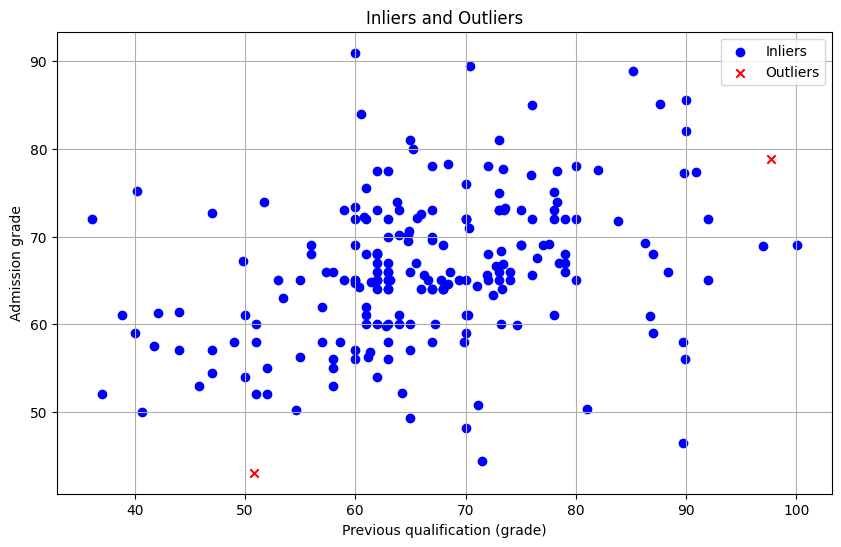

[(14, np.float64(40.64), np.float64(76.0)), (32, np.float64(81.0), np.float64(50.89))]


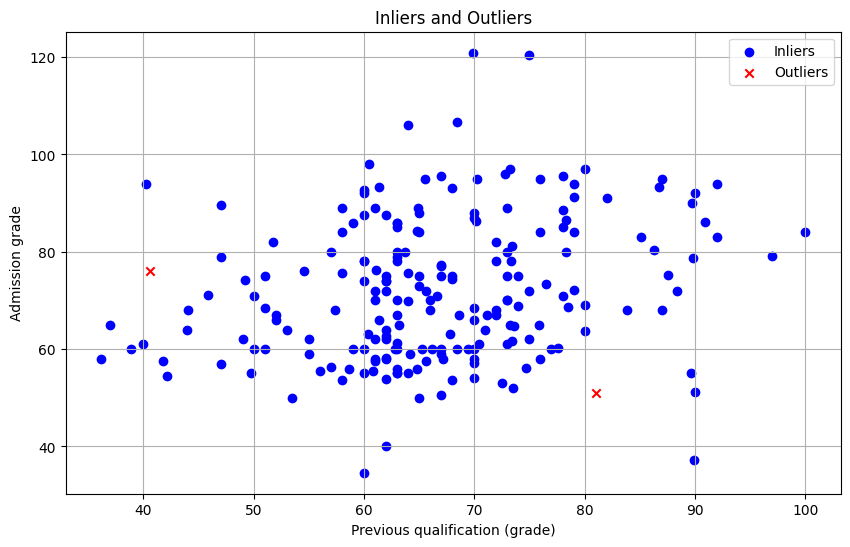

[(108, np.float64(100.02), np.float64(58.31)), (157, np.float64(86.76), np.float64(45.51))]


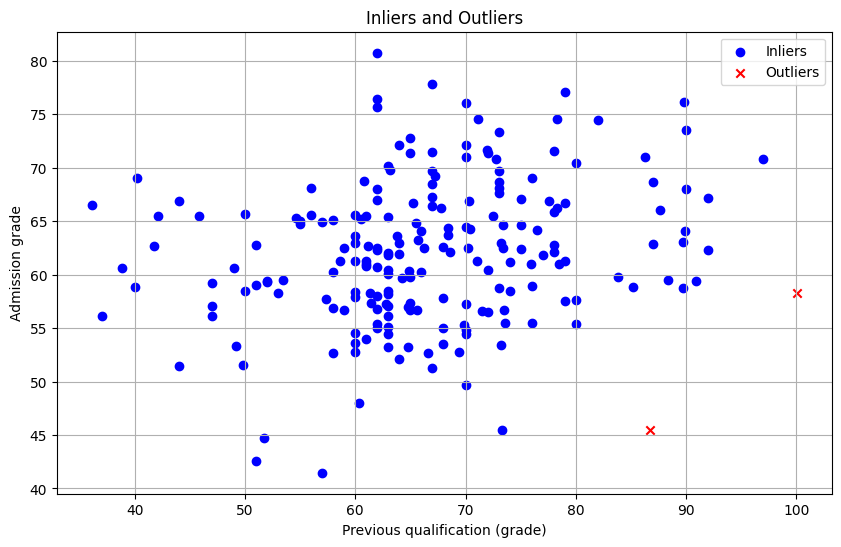

[(76, np.float64(89.46), np.float64(61.0)), (107, np.float64(85.55), np.float64(51.16))]


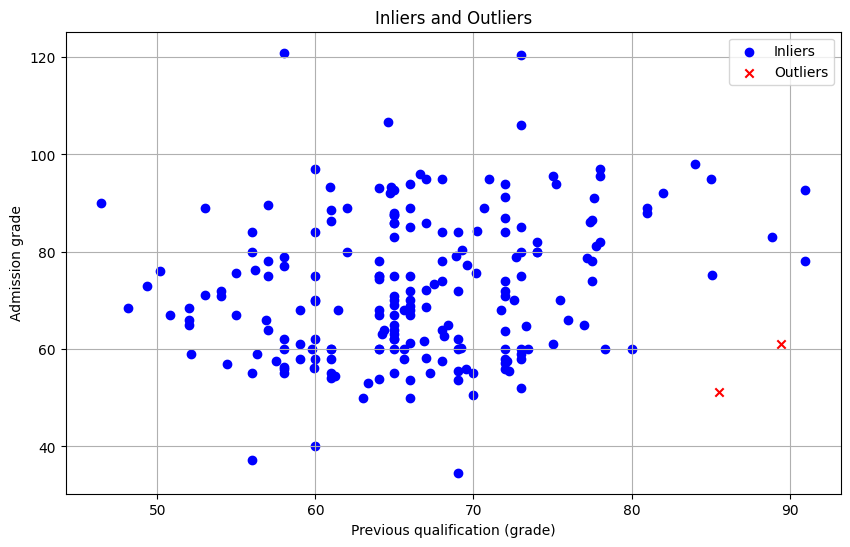

[(82, np.float64(74.0), np.float64(44.75)), (151, np.float64(88.9), np.float64(58.87))]


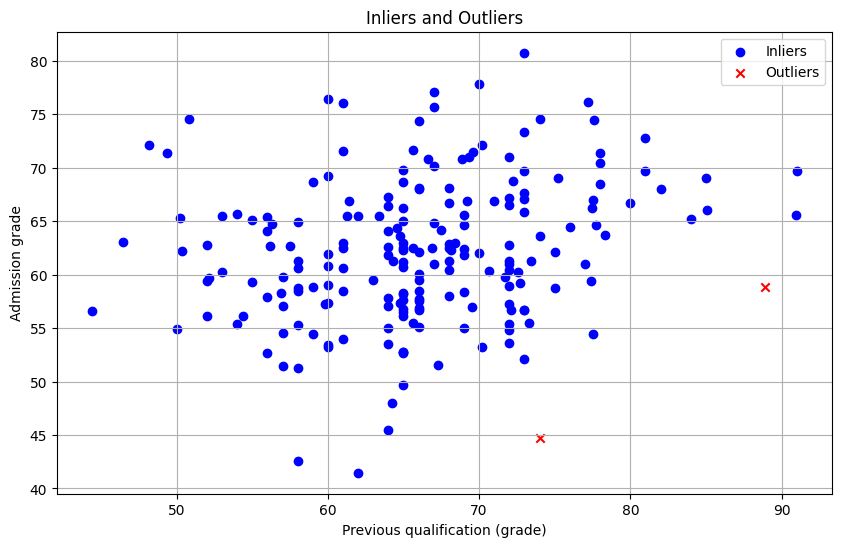

[(105, np.float64(120.89), np.float64(55.3)), (166, np.float64(39.99), np.float64(76.44))]


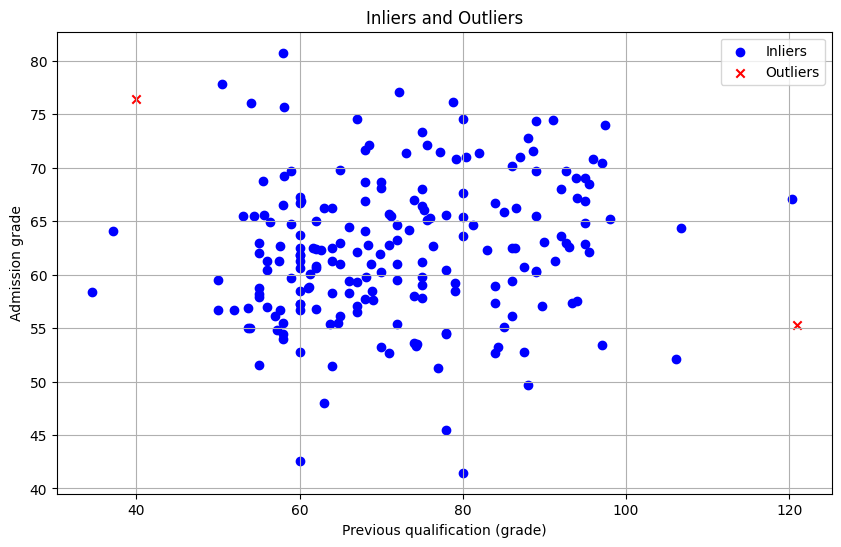

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    float64
 1   ssc_p           207 non-null    float64
 2   ssc_b           215 non-null    float64
 3   hsc_p           207 non-null    float64
 4   hsc_b           215 non-null    float64
 5   hsc_s           215 non-null    float64
 6   degree_p        207 non-null    float64
 7   degree_t        215 non-null    float64
 8   workex          215 non-null    float64
 9   etest_p         207 non-null    float64
 10  specialisation  215 non-null    float64
 11  mba_p           207 non-null    float64
 12  status          215 non-null    float64
dtypes: float64(13)
memory usage: 22.0 KB
Accuracy: 0.7906976744186046

Classification Report:
               precision    recall  f1-score   support

         0.0       0.82      0.90      0.86        31
         1.0   

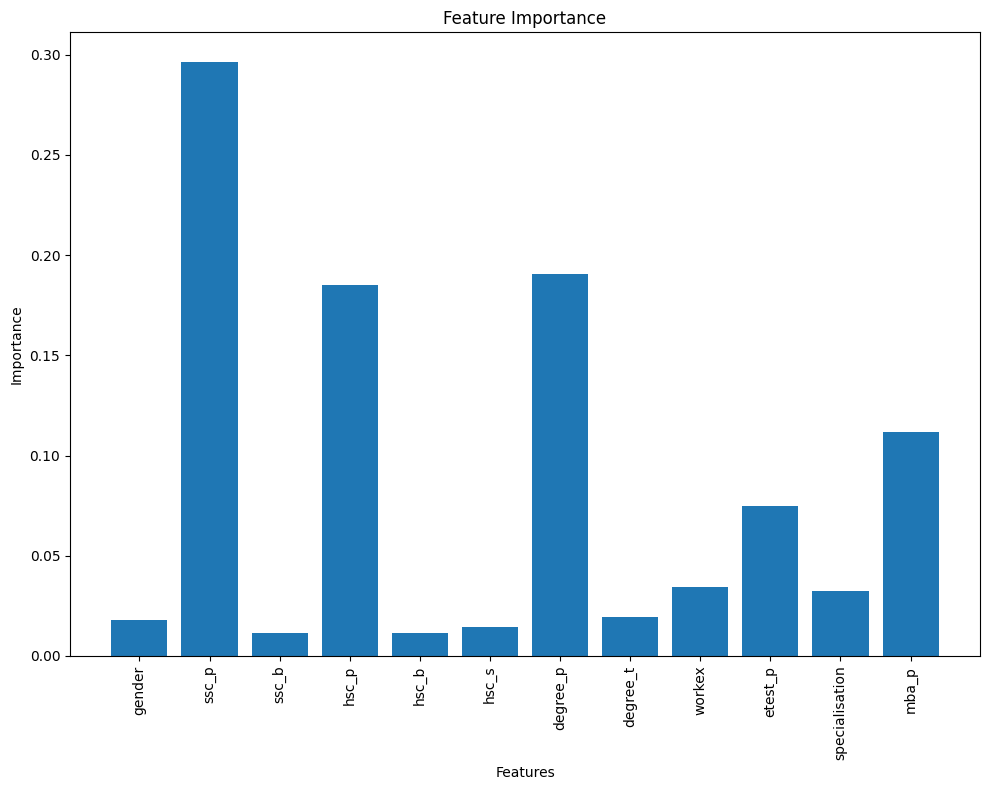

['Previous qualification (grade)', 'Admission grade', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)']
[(82, np.float64(160.0), np.float64(180.4)), (139, np.float64(178.0), np.float64(174.7)), (267, np.float64(154.0), np.float64(94.2)), (1002, np.float64(163.0), np.float64(175.6)), (1126, np.float64(133.8), np.float64(184.0)), (1274, np.float64(100.2), np.float64(90.1)), (1564, np.float64(106.0), np.float64(92.6)), (1888, np.float64(184.4), np.float64(169.3)), (2022, np.float64(170.4), np.float64(117.0)), (2128, np.float64(170.0), np.float64(176.7)), (2162, np.float64(91.0), np.float64(104.1)), (2180, np.float64(104.2), np.float64(166.3)), (2828, np.float64(105.7), np.float64(162.1)), (2857, np.float64(163.0), np.float64(95.0)), (2952, np.float64(100.0), np.float64(83.1)), (3109, np.float64(177.0), np.float64(162.3)), (3381, np.float64(167.6), np.float64(90.6)), (3760, np.float64(150.0), np.float64(93.3)), (3784, np.float64(107.4), np.float64(82.9)), (3943, np.fl

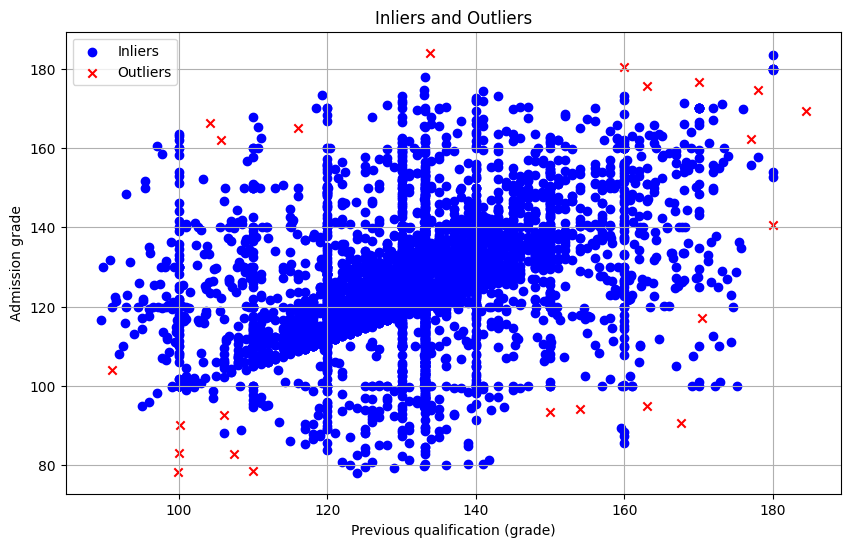

[(696, np.float64(165.0), np.float64(22.42266565)), (1215, np.float64(176.0), np.float64(5.72680166)), (1462, np.float64(91.4), np.float64(7.82171606)), (1815, np.float64(105.5), np.float64(24.69874454)), (2157, np.float64(110.6), np.float64(23.48817282)), (3471, np.float64(100.0), np.float64(25.72527363))]


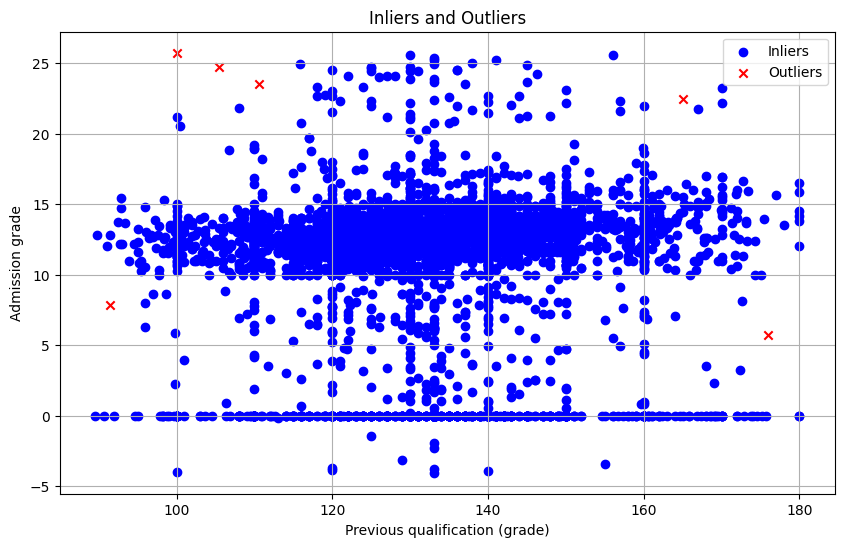

[(503, np.float64(99.3), np.float64(-4.32859492)), (1250, np.float64(167.0), np.float64(24.96297055)), (1401, np.float64(103.5), np.float64(25.68910834)), (1807, np.float64(149.2), np.float64(-5.62160258)), (2258, np.float64(91.0), np.float64(6.55103151)), (2555, np.float64(163.0), np.float64(5.959182)), (2921, np.float64(155.0), np.float64(5.46428576)), (3987, np.float64(155.0), np.float64(26.19089281))]


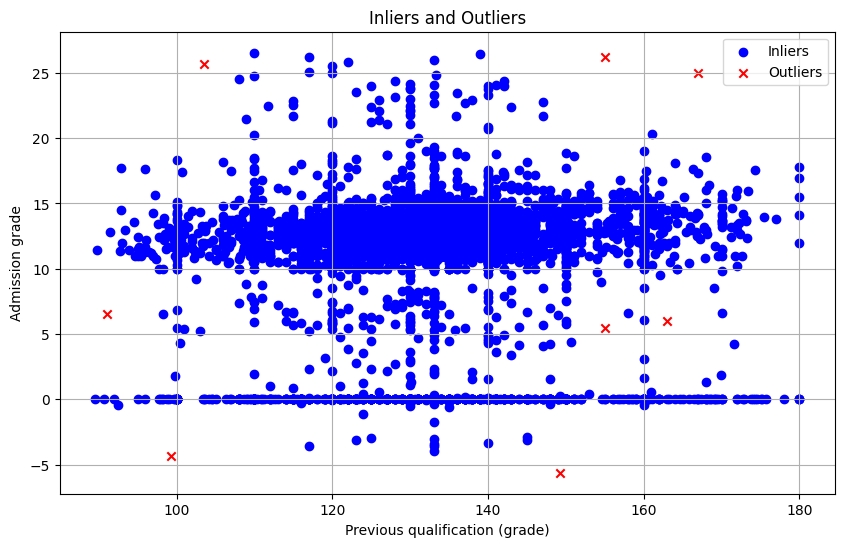

[(524, np.float64(183.5), np.float64(12.0)), (1061, np.float64(138.9), np.float64(-3.75394933)), (1206, np.float64(83.9), np.float64(24.52987411)), (1518, np.float64(141.4), np.float64(-4.03347026)), (1626, np.float64(93.6), np.float64(3.4010688)), (2347, np.float64(105.6), np.float64(21.82211721)), (2656, np.float64(167.3), np.float64(-3.43853056)), (2827, np.float64(171.9), np.float64(22.69385967)), (2885, np.float64(161.3), np.float64(25.57578332)), (3318, np.float64(115.8), np.float64(-3.81223804)), (3734, np.float64(79.3), np.float64(6.45824283)), (3944, np.float64(179.6), np.float64(0.0)), (3996, np.float64(85.0), np.float64(6.73021539)), (4133, np.float64(87.8), np.float64(23.26460473))]


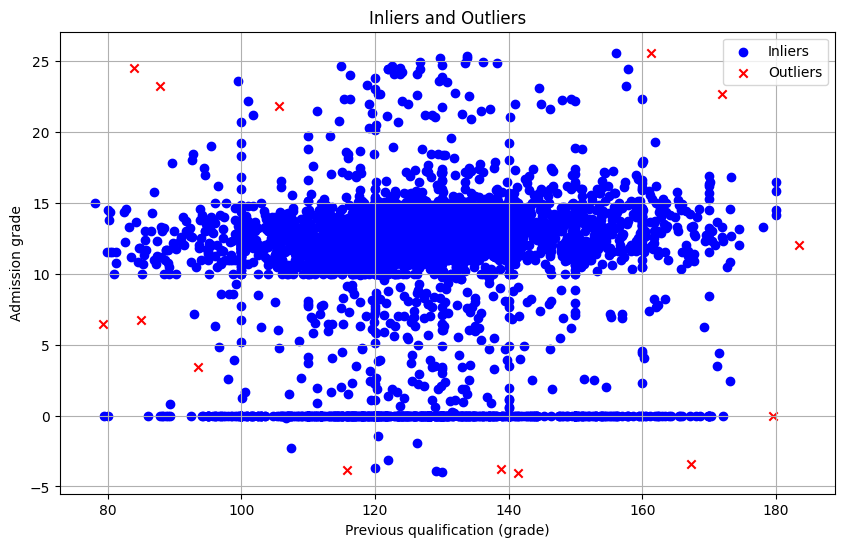

[(166, np.float64(170.0), np.float64(6.61375984)), (191, np.float64(89.2), np.float64(5.83089061)), (1053, np.float64(161.8), np.float64(23.98877021)), (1213, np.float64(91.8), np.float64(5.30545644)), (1826, np.float64(171.9), np.float64(4.57901586)), (1842, np.float64(155.2), np.float64(6.61021207)), (2688, np.float64(166.0), np.float64(20.69527401)), (3099, np.float64(151.0), np.float64(21.04775879)), (3313, np.float64(95.7), np.float64(24.98448387)), (3408, np.float64(80.0), np.float64(0.0)), (3688, np.float64(171.9), np.float64(22.99751828)), (3995, np.float64(126.5), np.float64(-3.99565613)), (4069, np.float64(132.7), np.float64(26.41509652)), (4321, np.float64(147.9), np.float64(22.79324336))]


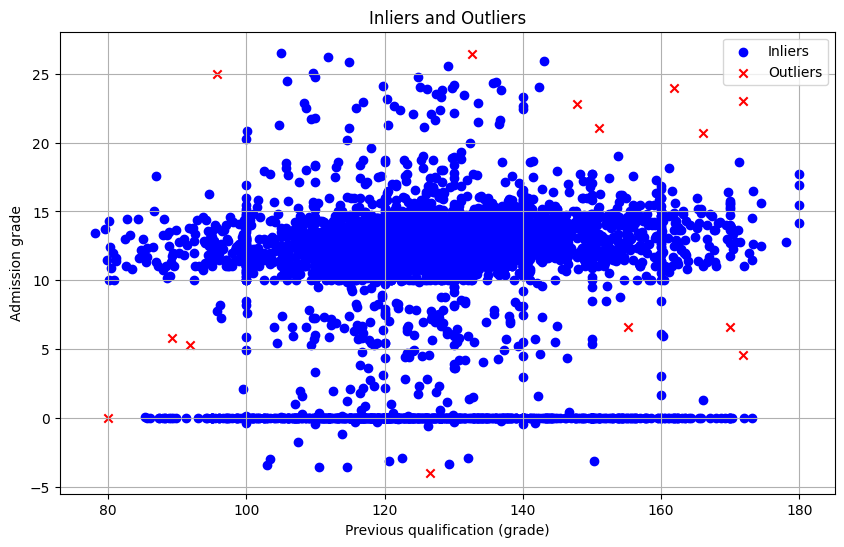

[(1717, np.float64(-3.98855987), np.float64(10.0)), (1765, np.float64(-3.88260531), np.float64(13.35445564)), (2243, np.float64(5.00358724), np.float64(4.55757048)), (2723, np.float64(20.52060801), np.float64(4.31375524)), (3891, np.float64(22.17689196), np.float64(22.05278466)), (4170, np.float64(4.15374933), np.float64(24.76565289)), (4249, np.float64(24.69345846), np.float64(3.59232778)), (4400, np.float64(3.4936735), np.float64(22.47053127))]


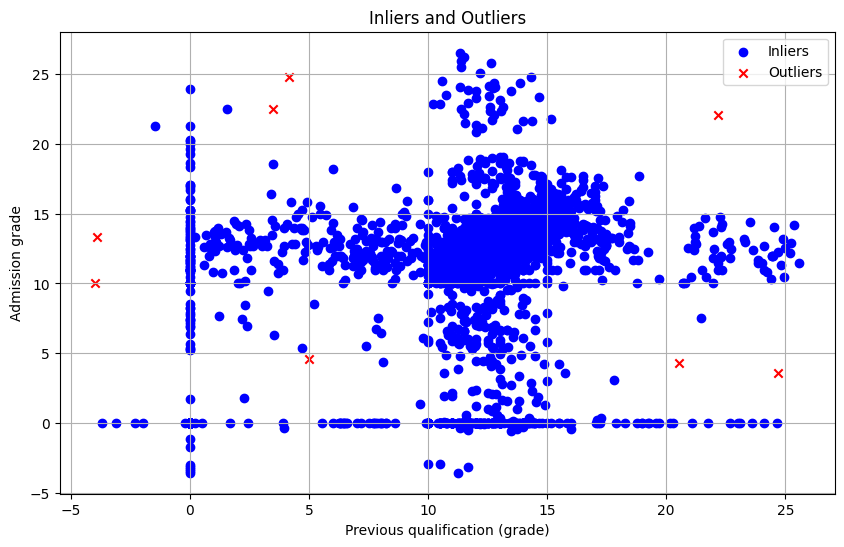

Accuracy: 0.7672316384180791

Classification Report:
               precision    recall  f1-score   support

         0.0       0.84      0.75      0.79       316
         1.0       0.77      0.95      0.85       418
         2.0       0.53      0.30      0.38       151

    accuracy                           0.77       885
   macro avg       0.71      0.67      0.67       885
weighted avg       0.75      0.77      0.75       885



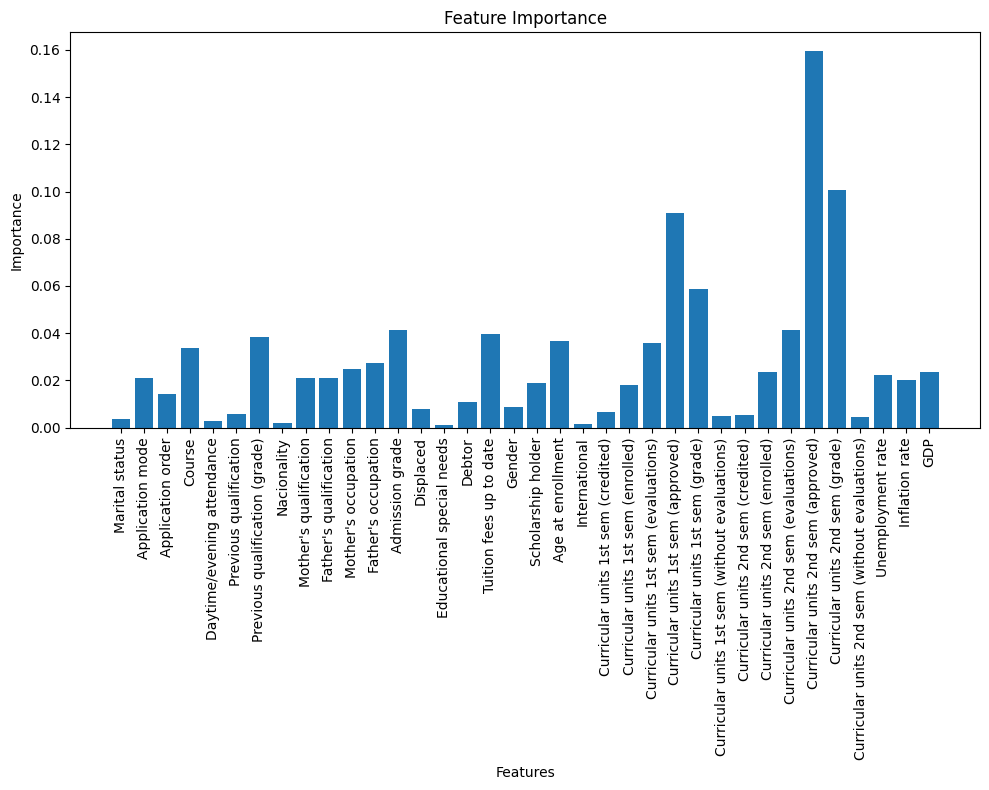

['StudyTimeWeekly', 'GPA']
[]


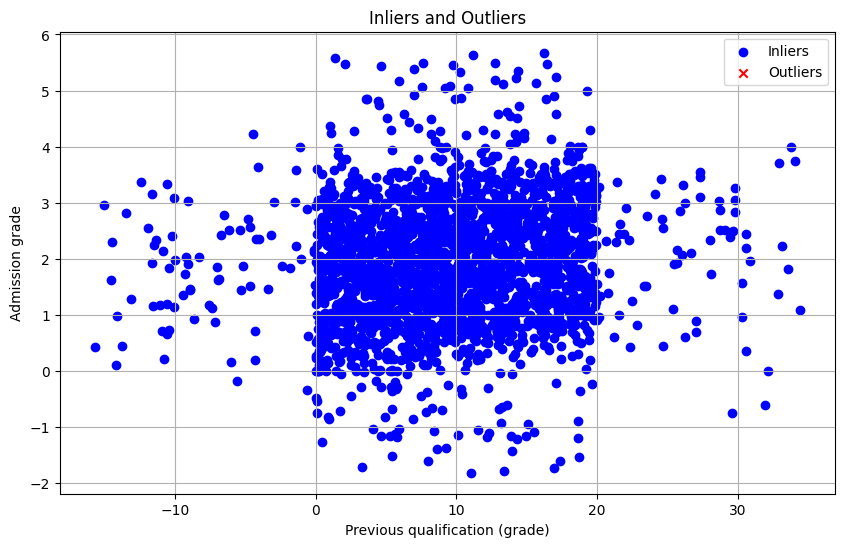

Accuracy: 0.8747390396659708

Classification Report:
               precision    recall  f1-score   support

         0.0       0.90      0.41      0.56        22
         1.0       0.75      0.80      0.77        49
         2.0       0.89      0.82      0.85        85
         3.0       0.83      0.83      0.83        86
         4.0       0.91      0.97      0.94       237

    accuracy                           0.87       479
   macro avg       0.85      0.76      0.79       479
weighted avg       0.88      0.87      0.87       479



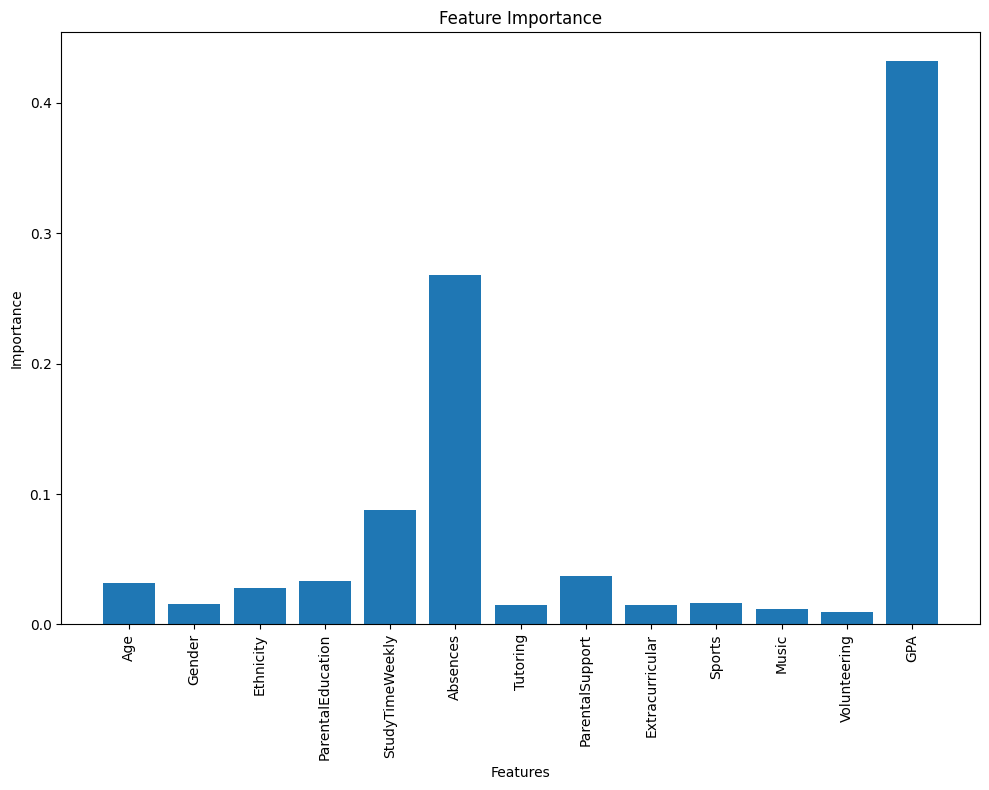

Total time taken: 39.55646300315857 seconds


In [171]:
run_ocsvm()